<a id='top'></a>
# Tavakaiv
An Exploration of the Pikes Peak Ascent and Marathon  
CSCI 4022 Advanced Data Science  
Fall 2019  
Mark Ivlev and Spencer Wegner

Links:  
[Data Cleaning](#data-cleaning) | 
[K-means Clustering](#clustering)  |
[Exploratory Data Analysis](#eda)  | 
[Results](#results)  |
[Alternate Solution](#altsoln)

<a id='data-cleaning'></a>
[Back to Top](#top)
### Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("/Users/spencerwegner/Documents/School/4th Year/fall-2019/csci-4022-data-science/project/tavakaiv/pikes_peak_results.csv")
#df = pd.read_csv("/Users/Mark Ivlev/Documents/GitHub/tavakaiv/pikes_peak_results.csv")
# drop name information
df=df.drop(columns='First')
df=df.drop(columns='Mi')
df=df.drop(columns='Last')

In [3]:
# update column types (convert times to strings for next step)
df = df.astype({'Pos': 'float', 'Div': 'str', 'Mpos': 'float', 'Mdiv': 'str', 'Sex': 'str', 'Age': 'float', \
                'Grp': 'str', 'City': 'str', 'State': 'str', 'NNup': 'str', 'BCupSplit': 'str', 'BCup': 'str', \
                'AFupSplit': 'str', 'AFup': 'str', 'AscSplit': 'str', 'Asc': 'str', 'AFdwnSplit': 'str', \
                'AFdwn': 'str', 'BCdwnSplit': 'str', 'BCdwn': 'str', 'NNdwnSplit': 'str', 'NNdwn': 'str', \
                'DwnSplit': 'str', 'Dwn': 'str', 'Mar': 'str', 'Race': 'str'})

In [4]:
# convert times (strings) to datetime type
df['NNup'] = pd.to_datetime(df['NNup'], format='%H:%M:%S')
df['BCupSplit'] = pd.to_datetime(df['BCupSplit'], format='%H:%M:%S')
df['BCup'] = pd.to_datetime(df['BCup'], format='%H:%M:%S')
df['AFupSplit'] = pd.to_datetime(df['AFupSplit'], format='%H:%M:%S')
df['AFup'] = pd.to_datetime(df['AFup'], format='%H:%M:%S')
df['AscSplit'] = pd.to_datetime(df['AscSplit'], format='%H:%M:%S')
df['Asc'] = pd.to_datetime(df['Asc'], format='%H:%M:%S')
df['AFdwnSplit'] = pd.to_datetime(df['AFdwnSplit'], format='%H:%M:%S')
df['AFdwn'] = pd.to_datetime(df['AFdwn'], format='%H:%M:%S')
df['BCdwnSplit'] = pd.to_datetime(df['BCdwnSplit'], format='%H:%M:%S')
df['BCdwn'] = pd.to_datetime(df['BCdwn'], format='%H:%M:%S')
df['NNdwnSplit'] = pd.to_datetime(df['NNdwnSplit'], format='%H:%M:%S')
df['NNdwn'] = pd.to_datetime(df['NNdwn'], format='%H:%M:%S')
df['DwnSplit'] = pd.to_datetime(df['DwnSplit'], format='%H:%M:%S')
df['Dwn'] = pd.to_datetime(df['Dwn'], format='%H:%M:%S')
df['Mar'] = pd.to_datetime(df['Mar'], format='%H:%M:%S')

In [5]:
# convert time to seconds
def time_seconds(hours, minutes, seconds):
    return 3600*hours + 60*minutes + seconds

# use lambda and apply to update time columns with seconds (takes a minute or so to run)
df['NNup'] = df.apply(lambda x: time_seconds(x['NNup'].hour, x['NNup'].minute, x['NNup'].second), axis=1)
df['BCupSplit'] = df.apply(lambda x: time_seconds(x['BCupSplit'].hour, x['BCupSplit'].minute, x['BCupSplit'].second), axis=1)
df['BCup'] = df.apply(lambda x: time_seconds(x['BCup'].hour, x['BCup'].minute, x['BCup'].second), axis=1)
df['AFupSplit'] = df.apply(lambda x: time_seconds(x['AFupSplit'].hour, x['AFupSplit'].minute, x['AFupSplit'].second), axis=1)
df['AFup'] = df.apply(lambda x: time_seconds(x['AFup'].hour, x['AFup'].minute, x['AFup'].second), axis=1)
df['AscSplit'] = df.apply(lambda x: time_seconds(x['AscSplit'].hour, x['AscSplit'].minute, x['AscSplit'].second), axis=1)
df['Asc'] = df.apply(lambda x: time_seconds(x['Asc'].hour, x['Asc'].minute, x['Asc'].second), axis=1)
df['AFdwnSplit'] = df.apply(lambda x: time_seconds(x['AFdwnSplit'].hour, x['AFdwnSplit'].minute, x['AFdwnSplit'].second), axis=1)
df['AFdwn'] = df.apply(lambda x: time_seconds(x['AFdwn'].hour, x['AFdwn'].minute, x['AFdwn'].second), axis=1)
df['BCdwnSplit'] = df.apply(lambda x: time_seconds(x['BCdwnSplit'].hour, x['BCdwnSplit'].minute, x['BCdwnSplit'].second), axis=1)
df['BCdwn'] = df.apply(lambda x: time_seconds(x['BCdwn'].hour, x['BCdwn'].minute, x['BCdwn'].second), axis=1)
df['NNdwnSplit'] = df.apply(lambda x: time_seconds(x['NNdwnSplit'].hour, x['NNdwnSplit'].minute, x['NNdwnSplit'].second), axis=1)
df['NNdwn'] = df.apply(lambda x: time_seconds(x['NNdwn'].hour, x['NNdwn'].minute, x['NNdwn'].second), axis=1)
df['DwnSplit'] = df.apply(lambda x: time_seconds(x['DwnSplit'].hour, x['DwnSplit'].minute, x['DwnSplit'].second), axis=1)
df['Dwn'] = df.apply(lambda x: time_seconds(x['Dwn'].hour, x['Dwn'].minute, x['Dwn'].second), axis=1)
df['Mar'] = df.apply(lambda x: time_seconds(x['Mar'].hour, x['Mar'].minute, x['Mar'].second), axis=1)

In [6]:
df.head() # DataFrame with both ascent and marathon racers

,ID,Pos,Div,Mpos,Mdiv,PPs,Sex,Age,Grp,City,...,AFdwn,BCdwnSplit,BCdwn,NNdwnSplit,NNdwn,DwnSplit,Dwn,Mar,Race,Year
0,79698,410.0,67/77,NaN,nan,1,F,34.0,30-34,COLORADO SPGS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2011
1,110626,257.0,40/132,NaN,nan,1,M,34.0,30-34,LAKEWOOD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2017
2,75566,891.0,86/102,NaN,nan,1,M,29.0,25-29,SAN ANTONIO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2009
3,70663,414.0,69/83,NaN,nan,2,F,39.0,35-39,COLORADO SPGS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2007
4,74588,397.0,49/63,NaN,nan,2,F,41.0,40-44,COLORADO SPGS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2009


In [7]:
# Drop DNFs: list of values to drop from Div and Mdiv columns
drop_list = ['',' ','?','DNF','DNF-11m','DNF-12+','DNF-3','DNF-4m','DNF-7m','DNF-8m','DNF-<AF','DNF-<BC',\
             'DNF-<BP','DNF-<BR','DNF-<NN','DNF->AF','DNF->BC','DNF-AF','DNF-AF+','DNF-BC','DNF-BC+',\
             'DNF-BP','DNF-BR','DNF-COG','DNF-CQ','DNF-FX','DNF-HR','DNF-INC','DNF-IO','DNF-NN','DNF-NN+',\
             'DNF-OCO','DNF-OCT','DNF-R','DNF-RX','DNF-SMK','DNF-ST','DNF-TMS','DNF-TOP','DNF-Top','DNF-UR',\
             'DNF-WET','DNF-Ws','DQ','DQ-AF','DQ-BC','DQ-SWAP','DQ-US','DQ-WAVE','DQ-Wave','DQed','nan']

In [8]:
# drop age group 1-15, any values from 'drop_list' in Div and Mdiv (placement) columns
for index, row in df.iterrows():
    if row['Grp'] == '01-15':
        df.drop(index, inplace=True)
    elif row['Race'] == 'A' and row['Div'] in drop_list:
        df.drop(index, inplace=True)
    elif row['Race'] == 'M' and row['Mdiv'] in drop_list:
        df.drop(index, inplace=True)

In [9]:
# create dataframe for ascent races
dfA = df[df.Race=='A']
dfA = dfA.drop(columns = ['AFdwnSplit', 'AFdwn', 'BCdwnSplit', 'BCdwn', 'NNdwnSplit', 'NNdwn', 'DwnSplit', \
                         'Dwn', 'Mar', 'Mpos', 'Mdiv'])
# create dataframe for marathon races
dfM = df[df.Race=='M']
dfM = dfM.drop(columns = ['Pos', 'Div'])

In [10]:
# take first part of placement before '/'
def parse_div(div):
    return div.split('/')[0]

# add columns for age group placement from first part of Div/Mdiv columns
dfA['Div_place'] = dfA.apply(lambda x: parse_div(x['Div']), axis=1)
dfM['Mdiv_place'] = dfM.apply(lambda x: parse_div(x['Mdiv']), axis=1)

In [11]:
dfA.head() # DF with only ascent racers

,ID,Pos,Div,PPs,Sex,Age,Grp,City,State,NNup,BCupSplit,BCup,AFupSplit,AFup,AscSplit,Asc,Race,Year,Div_place
0,79698,410.0,67/77,1,F,34.0,30-34,COLORADO SPGS,CO,NaN,NaN,NaN,NaN,NaN,NaN,19868.0,A,2011,67
1,110626,257.0,40/132,1,M,34.0,30-34,LAKEWOOD,CO,NaN,NaN,6734.0,3123.0,9857.0,4379.0,14236.0,A,2017,40
2,75566,891.0,86/102,1,M,29.0,25-29,SAN ANTONIO,TX,NaN,NaN,NaN,NaN,NaN,NaN,17868.0,A,2009,86
3,70663,414.0,69/83,2,F,39.0,35-39,COLORADO SPGS,CO,NaN,NaN,NaN,NaN,NaN,NaN,20781.0,A,2007,69
4,74588,397.0,49/63,2,F,41.0,40-44,COLORADO SPGS,CO,NaN,NaN,NaN,NaN,NaN,NaN,19931.0,A,2009,49


In [12]:
dfM.head() # DF with only marathon racers

,ID,Mpos,Mdiv,PPs,Sex,Age,Grp,City,State,NNup,...,BCdwnSplit,BCdwn,NNdwnSplit,NNdwn,DwnSplit,Dwn,Mar,Race,Year,Mdiv_place
12,111562,170.0,15/17,3,F,55.0,55-59,COLORADO SPRING,CO,5555.0,...,NaN,28728.0,NaN,NaN,NaN,13485.0,35225.0,M,2017,15
13,79048,402.0,51/70,1,M,52.0,50-54,CORAL SPRINGS,FL,NaN,...,NaN,NaN,NaN,NaN,NaN,11036.0,29031.0,M,2010,51
19,44930,164.0,54/101,3,M,31.0,30-34,AUSTIN,TX,NaN,...,NaN,NaN,NaN,NaN,NaN,7095.0,19276.0,M,1981,54
20,48926,197.0,56/108,3,M,32.0,30-34,WESTFORD,MA,NaN,...,NaN,NaN,NaN,NaN,NaN,7585.0,20372.0,M,1982,56
24,114099,14.0,3/79,3,M,35.0,35-39,BOULDER,CO,2783.0,...,1230.0,12965.0,1536.0,14501.0,1597.0,5981.0,16098.0,M,2018,3


<a id='clustering'></a>
### K-means Clustering

Prepare data for clustering by computing gender and age group scores. Instead of clustering based on overall time which would bias successful races to males and younger runners that have the fastest times, the normalized scores will enable the K-means model to work well and remove bias.  

Gender Score = time / fastest gender time  

Age Group Score = time / fastest age group time

In [13]:
# Ascent
# add score column to dfM
dfA['ag_score'] = np.nan
dfA['g_score'] = np.nan

# compute age group score = fastest AG Asc time / Asc time (1 for first in AG)
# compute gender score = fastest G Asc time / Asc time (1 for first place man/woman)
age_groups = ['30-34', '25-29', '35-39', '40-44', '20-24', '45-49', '50-54', '55-59', '60-64', \
              '16-19', '65-69', '70-74', '75-79','80-84', '85-89']
for year in range(1956, 2019):
    # age group score
    for ag in age_groups:
        for sex in ['M', 'F']:
            # create temporary DataFrame
            dfT = dfA.loc[(dfA['Year'] == year) & (dfA['Grp'] == ag) & (dfA['Sex'] == sex)]
            try:
                best_time = min(dfT['Asc'])
            except ValueError: # nobody in AG
                continue
            for index, row in dfT.iterrows():
                score = best_time/row['Asc']
                dfA.loc[index, 'ag_score'] = score
    # gender score          
    for sex in ['M', 'F']:
        dfT = dfA.loc[(dfA['Year'] == year) & (dfA['Sex'] == sex)]
        try:
            best_time = min(dfT['Asc'])
        except ValueError:
            continue
        for index, row in dfT.iterrows():
            score = best_time/row['Asc']
            dfA.loc[index, 'g_score'] = score

In [14]:
# Marathon
# add score column to dfM
dfM['ag_score'] = np.nan
dfM['g_score'] = np.nan

# compute age group score = fastest AG Mar time / Mar time (1 for first in AG)
# compute gender score = fastest G Mar time / Mar time (1 for first place man/woman)
age_groups = ['30-34', '25-29', '35-39', '40-44', '20-24', '45-49', '50-54', '55-59', '60-64', \
              '16-19', '65-69', '70-74', '75-79','80-84', '85-89']
for year in range(1956, 2019):
    # age group score
    for ag in age_groups:
        for sex in ['M', 'F']:
            # create temporary DataFrame
            dfT = dfM.loc[(dfM['Year'] == year) & (dfM['Grp'] == ag) & (dfM['Sex'] == sex)]
            try:
                best_time = min(dfT['Mar'])
            except ValueError: # nobody in AG
                continue
            for index, row in dfT.iterrows():
                score = best_time/row['Mar']
                dfM.loc[index, 'ag_score'] = score
    # gender score          
    for sex in ['M', 'F']:
        dfT = dfM.loc[(dfM['Year'] == year) & (dfM['Sex'] == sex)]
        try:
            best_time = min(dfT['Mar'])
        except ValueError:
            continue
        for index, row in dfT.iterrows():
            score = best_time/row['Mar']
            dfM.loc[index, 'g_score'] = score 

#### Further Data Cleaning

In [15]:
# drop NaN's in score column for ascent
for index, row in dfA.iterrows():
    if np.isnan(row['ag_score']):
        dfA.drop(index, inplace=True)
    elif np.isnan(row['g_score']):
        dfA.drop(index, inplace=True)
        
dfA = dfA.astype({'Div_place': 'float'})

In [16]:
# clean out age groups and entire genders where there is missing data and age group and gender scores are inflated
for index, row in dfA.iterrows():
    if row['ag_score'] == 1 and row['Div_place'] != 1:
        dfT = dfA.loc[(dfA['Year'] == row['Year']) & (dfA['Grp'] == row['Grp']) & (dfA['Sex'] == row['Sex'])]
        for idx, r in dfT.iterrows():
            try:
                dfA.drop(idx, inplace=True)
            except KeyError:
                continue
    elif row['g_score'] == 1 and row['Pos'] != 1:
        dfT = dfA.loc[(dfA['Year'] == row['Year']) & (dfA['Grp'] == row['Grp']) & (dfA['Sex'] == row['Sex'])]
        for idx, r in dfT.iterrows():
            try:
                dfA.drop(idx, inplace=True)
            except KeyError:
                continue

In [17]:
# drop NaN's in score column for marathon
for index, row in dfM.iterrows():
    if np.isnan(row['ag_score']):
        dfM.drop(index, inplace=True)
    elif np.isnan(row['g_score']):
        dfM.drop(index, inplace=True)
    elif row['Mdiv_place'] == '': # extra case for empty string in 'Mdiv_place'
        dfM.drop(index, inplace=True)
        
dfM = dfM.astype({'Mdiv_place': 'float'})

In [18]:
# clean out age groups and entire genders where there is missing data and age group and gender scores are inflated
for index, row in dfM.iterrows():
    if row['ag_score'] == 1 and row['Mdiv_place'] != 1:
        dfT = dfM.loc[(dfM['Year'] == row['Year']) & (dfM['Grp'] == row['Grp']) & (dfM['Sex'] == row['Sex'])]
        for idx, r in dfT.iterrows():
            try:
                dfM.drop(idx, inplace=True)
            except KeyError:
                continue
    elif row['g_score'] == 1 and row['Mpos'] != 1:
        dfT = dfM.loc[(dfM['Year'] == row['Year']) & (dfM['Grp'] == row['Grp']) & (dfM['Sex'] == row['Sex'])]
        for idx, r in dfT.iterrows():
            try:
                dfM.drop(idx, inplace=True)
            except KeyError:
                continue

#### K-means Model

In [19]:
'''
sklearn kmeans library
This kmeans implementation uses a "smart" initialization of centroids where the centroids
are generally spread out to speed up convergence. This implementation runs the clustering 10
different times and chooses the best initialization based on inertia. 
'''
a1=np.array(dfA['ag_score'])
a2=np.array(dfA['g_score'])
A=np.vstack((a1, a2)).T    
    
kmeans = KMeans(n_clusters=5).fit_predict(A)
cents = KMeans(n_clusters=5).fit(A)
centers = cents.cluster_centers_

In [20]:
# identify which races are in the upper right ("best") cluster and create a new DataFrame
# cluster centers indices and kmeans/label output do not always line up
indices=[]
clstr_number=kmeans[5] # we know this row is definitely in the upper right cluster
for i in range(len(kmeans)):
    if kmeans[i]==clstr_number:
        indices.append(i)
dfBCA=dfA.iloc[indices].copy()

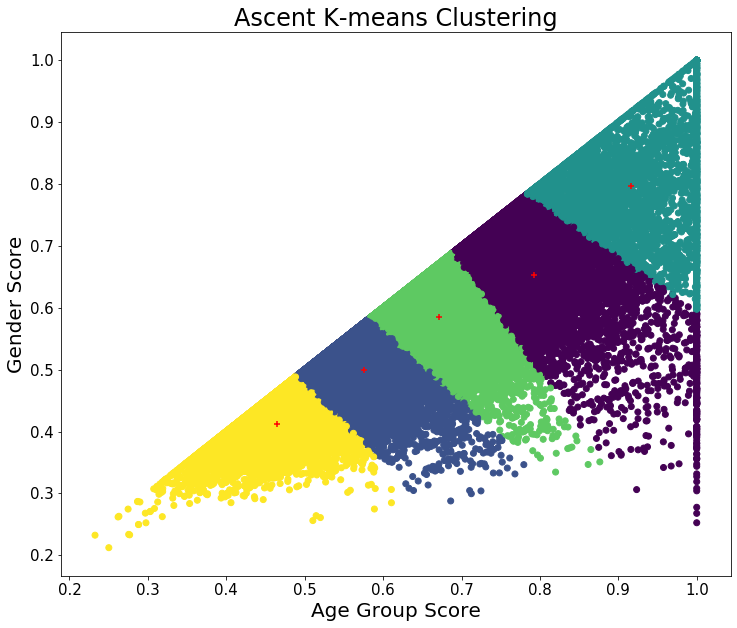

In [21]:
fig, ax = plt.subplots(1,1, figsize=(12,10))
plt.scatter([x[0] for x in A], [x[1] for x in A], c=kmeans)
plt.scatter([x[0] for x in centers], [x[1] for x in centers], c='red', marker='+')
ax.set_title('Ascent K-means Clustering', size=24)
plt.xlabel("Age Group Score", size=20)
plt.ylabel("Gender Score", size=20)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [22]:
# kmeans for marathon
m1=np.array(dfM['ag_score'])
m2=np.array(dfM['g_score'])
M=np.vstack((m1, m2)).T
    
kmeansM = KMeans(n_clusters=5).fit_predict(M)
centsM = KMeans(n_clusters=5).fit(M)
centersM = centsM.cluster_centers_

In [23]:
# identify races that are in the upper right cluster (same process as for ascent data above)
indices=[]
clstr_number=kmeansM[4]
for i in range(len(kmeansM)):
    if kmeansM[i]==clstr_number:
        indices.append(i)
dfBCM=dfM.iloc[indices].copy()

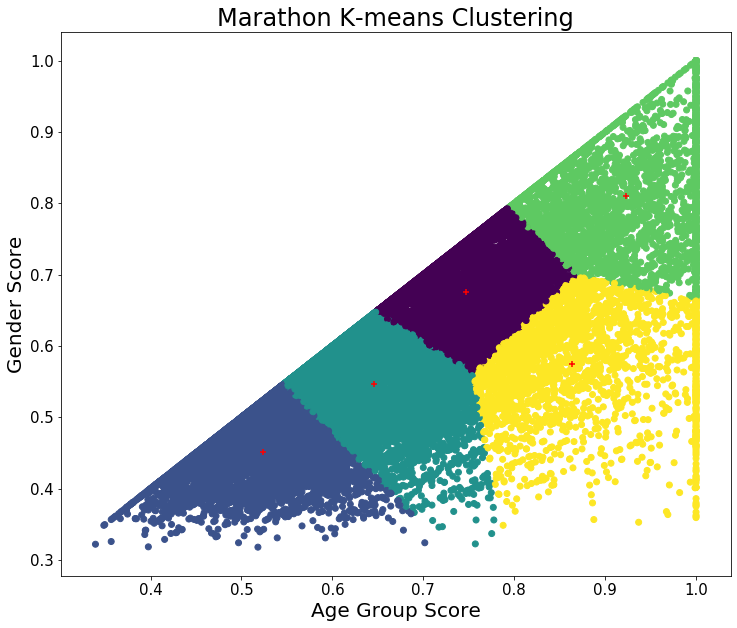

In [24]:
fig, ax = plt.subplots(1,1, figsize=(12,10))
plt.scatter([x[0] for x in M], [x[1] for x in M], c=kmeansM)
plt.scatter([x[0] for x in centersM], [x[1] for x in centersM], c='red', marker='+')
ax.set_title('Marathon K-means Clustering', size=24)
plt.xlabel("Age Group Score", size=20)
plt.ylabel("Gender Score", size=20)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

<a id='eda'></a>
[Back to Top](#top)
### Exploratory Data Analysis

| Split Key     | Location      | Distance | Starting Elevation | Ending Elevation | Gain |
|:------------- |:-------------|:----|:----|:-----|:-----|
| NNup      | Start to No Name Creek | 4.3 Miles | 6,300 Feet | 8,800 Feet | 2,500 Feet |
| BCupSplit      | No Name Creek to Barr Camp   | 3.3 Miles | 8,800 Feet | 10,200 Feet | 1,400 Feet |
| AFupSplit | Barr Camp to A-Frame   | 2.6 Miles | 10,200 Feet | 11,950 Feet | 1,750 Feet |
| AscSplit  | A-Frame to Summit  | 3.12 Miles | 11,950 Feet | 14,115 Feet | 2,165 Feet |

### Best Cluster

Grab the races from the best cluster identified in K-means that have split times (2013 to present). Compute a score for each split as the percentage of the total ascent or descent time. 

Example: NNup_pct represents the percentage of the ascent that a runner spends between the start line and No Name Creek. 

In [25]:
# Ascent splits best cluster
# use .copy() to ensure a copy of dfBCA is made => avoid the SettingwithCopyWarning
dfBCA_splits = dfBCA.loc[dfBCA['Year'] >= 2013].copy()

# initialize new columns that represent the percentage of each split of the total race time
dfBCA_splits['NNup_pct'] = np.nan
dfBCA_splits['BCupSplit_pct'] = np.nan
dfBCA_splits['AFupSplit_pct'] = np.nan
dfBCA_splits['AscSplit_pct'] = np.nan

for index, row in dfBCA_splits.iterrows():
    dfBCA_splits.loc[index, 'NNup_pct'] = row['NNup']/row['Asc']
    dfBCA_splits.loc[index, 'BCupSplit_pct'] = row['BCupSplit']/row['Asc']
    dfBCA_splits.loc[index, 'AFupSplit_pct'] = row['AFupSplit']/row['Asc']
    dfBCA_splits.loc[index, 'AscSplit_pct'] = row['AscSplit']/row['Asc']
# drop bad data
dfBCA_splits.drop(7110, inplace=True)
dfBCA_splits.drop(28557, inplace=True)

In [26]:
# Marathon splits best cluster
# use .copy() to ensure a copy of dfBCA is made => avoid the SettingwithCopyWarning
dfBCM_splits = dfBCM.loc[dfBCM['Year'] >= 2013].copy()

# initialize new columns that represent the percentage of each split of the total race time
dfBCM_splits['NNup_pct'] = np.nan
dfBCM_splits['BCupSplit_pct'] = np.nan
dfBCM_splits['AFupSplit_pct'] = np.nan
dfBCM_splits['AscSplit_pct'] = np.nan
dfBCM_splits['AFdwnSplit_pct'] = np.nan
dfBCM_splits['BCdwnSplit_pct'] = np.nan
dfBCM_splits['NNdwnSplit_pct'] = np.nan
dfBCM_splits['DwnSplit_pct'] = np.nan
dfBCM_splits['dwn_pct_asc'] = np.nan

for index, row in dfBCM_splits.iterrows():
    # uphill
    dfBCM_splits.loc[index, 'NNup_pct'] = row['NNup']/row['Asc']
    dfBCM_splits.loc[index, 'BCupSplit_pct'] = row['BCupSplit']/row['Asc']
    dfBCM_splits.loc[index, 'AFupSplit_pct'] = row['AFupSplit']/row['Asc']
    dfBCM_splits.loc[index, 'AscSplit_pct'] = row['AscSplit']/row['Asc']
    # downhill
    dfBCM_splits.loc[index, 'AFdwnSplit_pct'] = row['AFdwnSplit']/row['Dwn']
    dfBCM_splits.loc[index, 'BCdwnSplit_pct'] = row['BCdwnSplit']/row['Dwn']
    dfBCM_splits.loc[index, 'NNdwnSplit_pct'] = row['NNdwnSplit']/row['Dwn']
    dfBCM_splits.loc[index, 'DwnSplit_pct'] = row['DwnSplit']/row['Dwn']
    # calculate the percentage of downhill time to the uphill time
    dfBCM_splits.loc[index, 'dwn_pct_asc'] = row['Dwn']/row['Asc']
# drop bad data
dfBCM_splits.drop(38, inplace=True)

In [27]:
dfBCM_splits.mean()

ID                104846.198083
Mpos                  18.274760
PPs                    7.169329
Age                   37.789137
NNup                3188.886364
BCupSplit           2400.581169
BCup                5609.757188
AFupSplit           2541.297125
AFup                8151.325879
AscSplit            3578.543131
Asc                11730.162939
AFdwnSplit          1961.248276
AFdwn              13699.544828
BCdwnSplit          1437.234483
BCdwn              15136.714744
NNdwnSplit          1626.570342
NNdwn              16755.749049
DwnSplit            1872.821293
Dwn                 6883.226837
Mar                18613.453674
Year                2015.060703
Mdiv_place             2.728435
ag_score               0.932888
g_score                0.807872
NNup_pct               0.273139
BCupSplit_pct          0.205379
AFupSplit_pct          0.216446
AscSplit_pct           0.304890
AFdwnSplit_pct         0.283605
BCdwnSplit_pct         0.207901
NNdwnSplit_pct         0.236264
DwnSplit

### All Clusters
Grab the races from all of the K-means clusters that have split times. 

In [28]:
# Ascent splits all clusters
# use .copy() to ensure a copy of dfBCA is made => avoid the SettingwithCopyWarning
dfA_splits = dfA.loc[dfA['Year'] >= 2013].copy()

# initialize new columns that represent the percentage of each split of the total race time
dfA_splits['NNup_pct'] = np.nan
dfA_splits['BCupSplit_pct'] = np.nan
dfA_splits['AFupSplit_pct'] = np.nan
dfA_splits['AscSplit_pct'] = np.nan

for index, row in dfA_splits.iterrows():
    dfA_splits.loc[index, 'NNup_pct'] = row['NNup']/row['Asc']
    dfA_splits.loc[index, 'BCupSplit_pct'] = row['BCupSplit']/row['Asc']
    dfA_splits.loc[index, 'AFupSplit_pct'] = row['AFupSplit']/row['Asc']
    dfA_splits.loc[index, 'AscSplit_pct'] = row['AscSplit']/row['Asc']
# drop bad data
# NOTE: still need to go through and drop bad outlier data like done for the Marathon
#dfBCA_splits.drop(7110, inplace=True)
#dfBCA_splits.drop(28557, inplace=True)

In [29]:
# Marathon splits all clusters
# use .copy() to ensure a copy of dfBCA is made => avoid the SettingwithCopyWarning
dfM_splits = dfM.loc[dfM['Year'] >= 2013].copy()

# initialize new columns that represent the percentage of each split of the total race time
dfM_splits['NNup_pct'] = np.nan
dfM_splits['BCupSplit_pct'] = np.nan
dfM_splits['AFupSplit_pct'] = np.nan
dfM_splits['AscSplit_pct'] = np.nan
dfM_splits['AFdwnSplit_pct'] = np.nan
dfM_splits['BCdwnSplit_pct'] = np.nan
dfM_splits['NNdwnSplit_pct'] = np.nan
dfM_splits['DwnSplit_pct'] = np.nan
dfM_splits['dwn_pct_asc'] = np.nan

for index, row in dfM_splits.iterrows():
    # uphill
    dfM_splits.loc[index, 'NNup_pct'] = row['NNup']/row['Asc']
    dfM_splits.loc[index, 'BCupSplit_pct'] = row['BCupSplit']/row['Asc']
    dfM_splits.loc[index, 'AFupSplit_pct'] = row['AFupSplit']/row['Asc']
    dfM_splits.loc[index, 'AscSplit_pct'] = row['AscSplit']/row['Asc']
    # downhill
    dfM_splits.loc[index, 'AFdwnSplit_pct'] = row['AFdwnSplit']/row['Dwn']
    dfM_splits.loc[index, 'BCdwnSplit_pct'] = row['BCdwnSplit']/row['Dwn']
    dfM_splits.loc[index, 'NNdwnSplit_pct'] = row['NNdwnSplit']/row['Dwn']
    dfM_splits.loc[index, 'DwnSplit_pct'] = row['DwnSplit']/row['Dwn']
    # calculate the percentage of downhill time to the uphill time
    dfM_splits.loc[index, 'dwn_pct_asc'] = row['Dwn']/row['Asc']
# drop bad data
dfM_splits.drop(79335, inplace=True)
dfM_splits.drop(38, inplace=True)
dfM_splits.drop(6582, inplace=True)
dfM_splits.drop(26676, inplace=True)
dfM_splits.drop(31650, inplace=True)
dfM_splits.drop(66883, inplace=True)
dfM_splits.drop(49651, inplace=True)
dfM_splits.drop(51767, inplace=True)
dfM_splits.drop(5332, inplace=True)
dfM_splits.drop(44610, inplace=True)
dfM_splits.drop(51214, inplace=True)
dfM_splits.drop(56278, inplace=True)
dfM_splits.drop(70835, inplace=True)
dfM_splits.drop(78518, inplace=True)
dfM_splits.drop(7891, inplace=True)
dfM_splits.drop(24035, inplace=True)
dfM_splits.drop(27618, inplace=True)
dfM_splits.drop(29676, inplace=True)
dfM_splits.drop(37570, inplace=True)
dfM_splits.drop(40804, inplace=True)
dfM_splits.drop(65651, inplace=True)

for index, row in dfM_splits.iterrows():
    if row['Year'] == 2015 and (np.isnan(row['BCdwnSplit_pct']) or np.isnan(row['NNdwnSplit_pct'])):
        dfM_splits.drop(index, inplace=True)

In [30]:
dfM_splits.mean()

ID                106238.112847
Mpos                 214.265377
PPs                    6.194444
Age                   42.643513
NNup                4167.437940
BCupSplit           3166.841430
BCup                7335.545093
AFupSplit           3541.738202
AFup               10880.581845
AscSplit            5265.524306
Asc                16146.368552
AFdwnSplit          2995.175261
AFdwn              18873.797615
BCdwnSplit          2151.971746
BCdwn              21344.074463
NNdwnSplit          2235.561262
NNdwn              23097.137713
DwnSplit            2570.275759
Dwn                10180.678571
Mar                26327.127976
Year                2015.386657
Mdiv_place            27.541419
ag_score               0.680264
g_score                0.551723
NNup_pct               0.259745
BCupSplit_pct          0.197019
AFupSplit_pct          0.218957
AscSplit_pct           0.324251
AFdwnSplit_pct         0.297902
BCdwnSplit_pct         0.214761
NNdwnSplit_pct         0.227195
DwnSplit

<a id='results'></a>
[Back to Top](#top)
### Marathon Split Results

| Splits | No Name Creek UP | Barr Camp UP | A-Frame UP | Final UP | A-Frame DOWN | Barr Camp DOWN | No Name Creek DOWN | Final DOWN | Descent / Ascent | 
|:---|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| All Clusters | 26% | 19.7% | 21.9% | 32.4% | 29.8% | 21.5% | 22.7% | 26% | 63% |
| Best Cluster | 27.3% | 20.5% | 21.6% | 30.5% | 28.4% | 20.8% | 23.6% | 27.2% | 58.8% |

### Futher Demographic EDA

Look at how experience (number of Pikes Peak races run) impacts age group and gender score.  

**NOTE:** After completing the analysis we realized that the data is inaccurate. This is because the experience value (PP) is the same for every race that a runner did. Even if the runner ran 10 races the entry for their first race shows 10. 

In [31]:
first_time=[] # 1 race
some_exp=[] # 2-4 races
mid_exp=[] # 5-10 races
high_exp=[] # > 10 races

for index, row in dfM_splits.iterrows():
    if(row['PPs']==1):
        first_time.append((row['ag_score'],row['g_score']))
    elif row['PPs']>1 and row['PPs']<=4:
        some_exp.append((row['ag_score'],row['g_score']))
    elif row['PPs']>4 and row['PPs']<=10:
        mid_exp.append((row['ag_score'],row['g_score']))
    else:
        high_exp.append((row['ag_score'],row['g_score']))

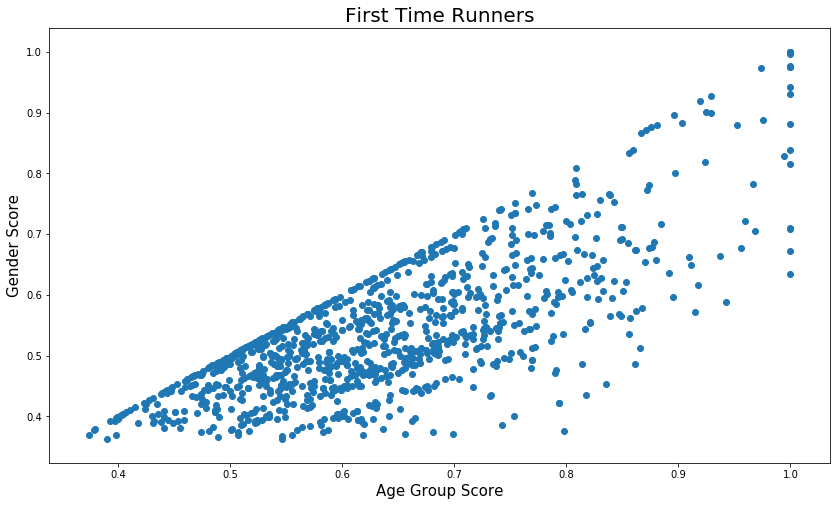

In [32]:
x=[]
y=[]
for i in range(len(first_time)):
    x.append(first_time[i][0])
    y.append(first_time[i][1])  

fig, ax = plt.subplots(1,1, figsize=(14,8))

plt.scatter(x,y)
ax.set_title('First Time Runners', size=20)
plt.xlabel("Age Group Score", size=15)
plt.ylabel("Gender Score", size=15)
plt.show()

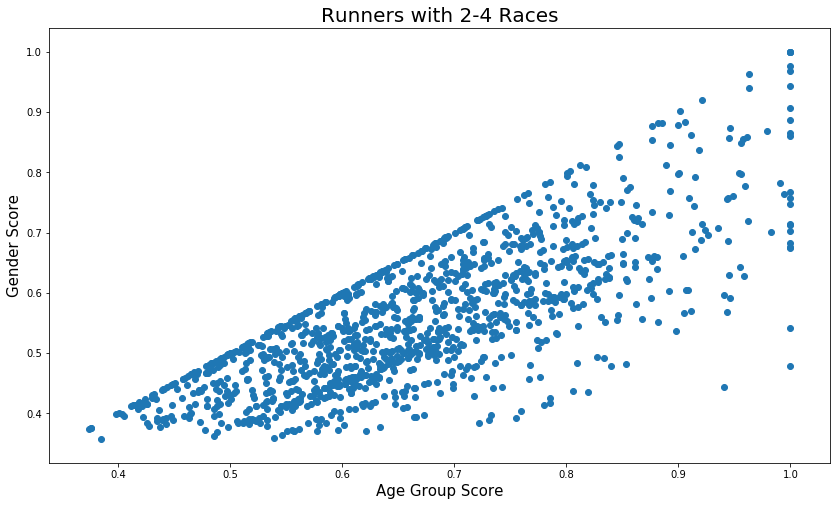

In [33]:
x=[]
y=[]
for i in range(len(some_exp)):
    x.append(some_exp[i][0])
    y.append(some_exp[i][1])  

fig, ax = plt.subplots(1,1, figsize=(14,8))

plt.scatter(x,y)
ax.set_title('Runners with 2-4 Races', size=20)
plt.xlabel("Age Group Score", size=15)
plt.ylabel("Gender Score", size=15)
plt.show()

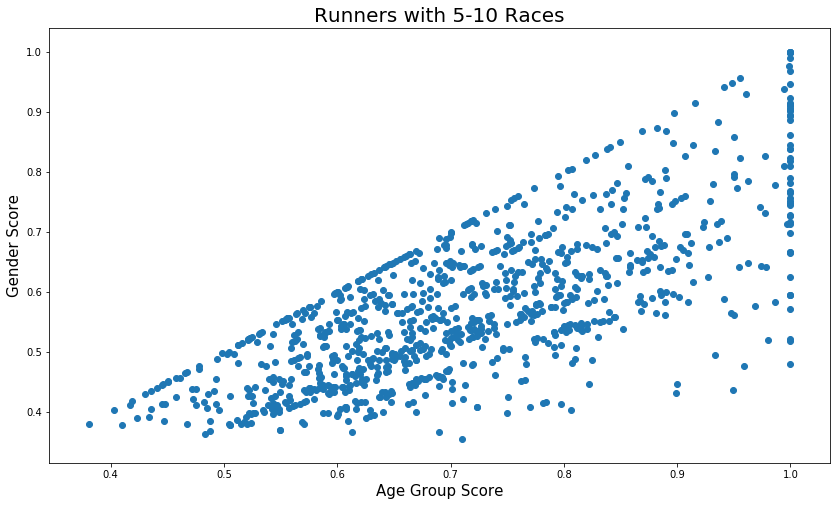

In [34]:
x=[]
y=[]
for i in range(len(mid_exp)):
    x.append(mid_exp[i][0])
    y.append(mid_exp[i][1])  

fig, ax = plt.subplots(1,1, figsize=(14,8))

plt.scatter(x,y)
ax.set_title('Runners with 5-10 Races', size=20)
plt.xlabel("Age Group Score", size=15)
plt.ylabel("Gender Score", size=15)
plt.show()

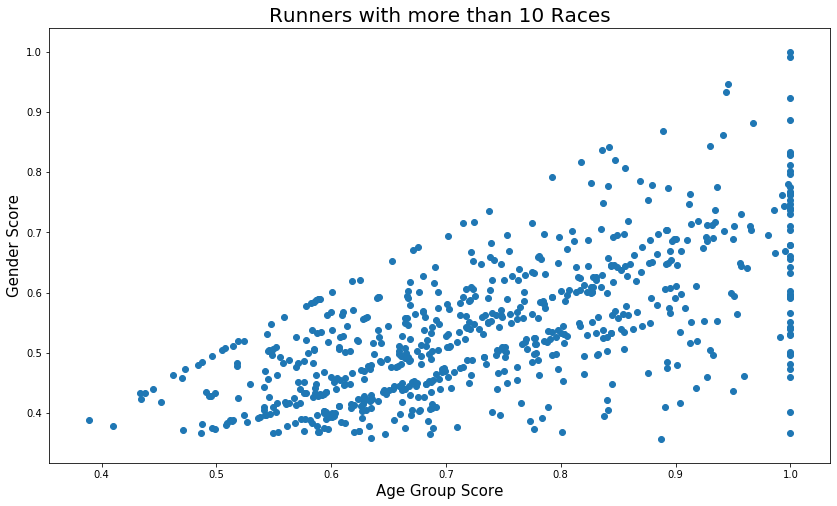

In [35]:
x=[]
y=[]
for i in range(len(high_exp)):
    x.append(high_exp[i][0])
    y.append(high_exp[i][1])  

fig, ax = plt.subplots(1,1, figsize=(14,8))

plt.scatter(x,y)
ax.set_title('Runners with more than 10 Races', size=20)
plt.xlabel("Age Group Score", size=15)
plt.ylabel("Gender Score", size=15)
plt.show()

Look at experience level compared to finish time.  

**NOTE:** After completing the analysis we realized that the data is inaccurate. This is because the experience value (PP) is the same for every race that a runner did. Even if the runner ran 10 races the entry for their first race shows 10. 

In [36]:
exp_v_time=[]
avgs=np.zeros(65)
counts=np.zeros(65)

for index, row in dfM.iterrows():
    exp_v_time.append((row['PPs'],row['Mar']))
    
for i in range(len(exp_v_time)):
    temp=exp_v_time[i][0]
    avgs[temp]+=exp_v_time[i][1]
    counts[temp]+=1
        
for i in range(len(avgs)):
    avgs[i]=avgs[i]/counts[i]

/Users/spencerwegner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


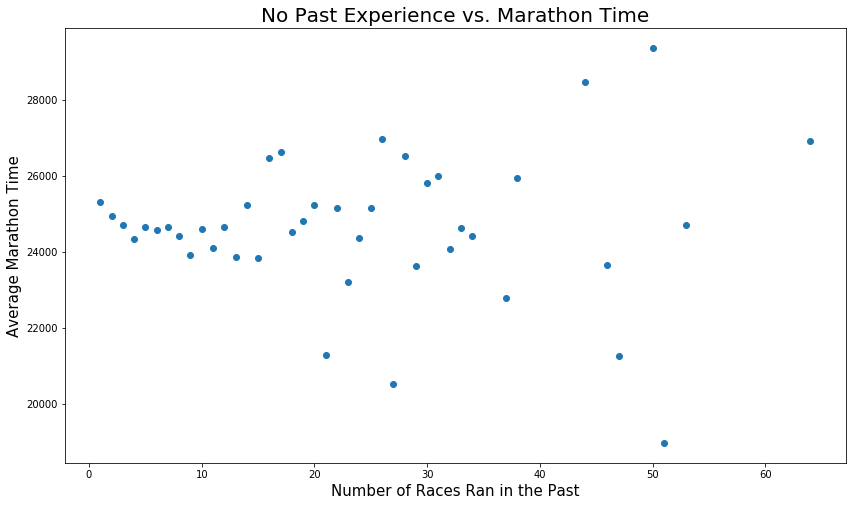

In [37]:
PPs=[]
for i in range(len(avgs)):
    PPs.append(i)

fig, ax = plt.subplots(1,1, figsize=(14,8))

plt.scatter(PPs,avgs)
ax.set_title('No Past Experience vs. Marathon Time', size=20)
plt.xlabel("Number of Races Ran in the Past", size=15)
plt.ylabel("Average Marathon Time", size=15)
plt.show()

In [38]:
exp_v_time=[]
avgs=np.zeros(65)
counts=np.zeros(65)

for index, row in dfA.iterrows():
    exp_v_time.append((row['PPs'],row['Asc']))
    
for i in range(len(exp_v_time)):
    temp=exp_v_time[i][0]
    avgs[temp]+=exp_v_time[i][1]
    counts[temp]+=1
        
for i in range(len(avgs)):
    avgs[i]=avgs[i]/counts[i]

/Users/spencerwegner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


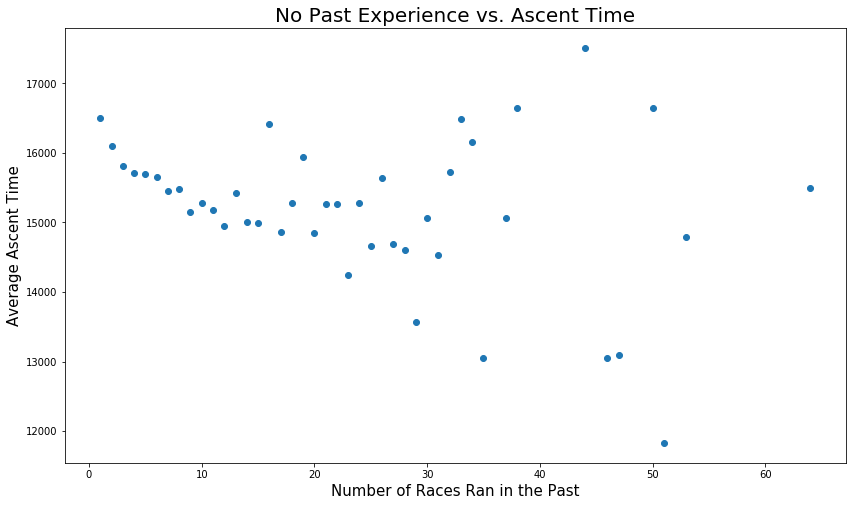

In [39]:
PPs=[]
for i in range(len(avgs)):
    PPs.append(i)

fig, ax = plt.subplots(1,1, figsize=(14,8))

plt.scatter(PPs,avgs)
ax.set_title('No Past Experience vs. Ascent Time', size=20)
plt.xlabel("Number of Races Ran in the Past", size=15)
plt.ylabel("Average Ascent Time", size=15)
plt.show()

<a id='altsoln'></a>
[Back to Top](#top)
### Alternate Solution
Instead of K-means clustering, we could have simply looked at average time for every age to select sucessful races. Below are plots that show age compared to finish time and the red line is the average time for each age. We could have simply taken all races that were below a certain threshold for each age. 

In [40]:
avg_time = []

for age in range(16,82):
    dfT = dfM.loc[dfM['Age'] == age]
    avg_time.append(dfT['Mar'].mean())
    
times = dfM['Mar']
ages = dfM['Age']
best_times = dfBCM['Mar']
best_ages = dfBCM['Age']

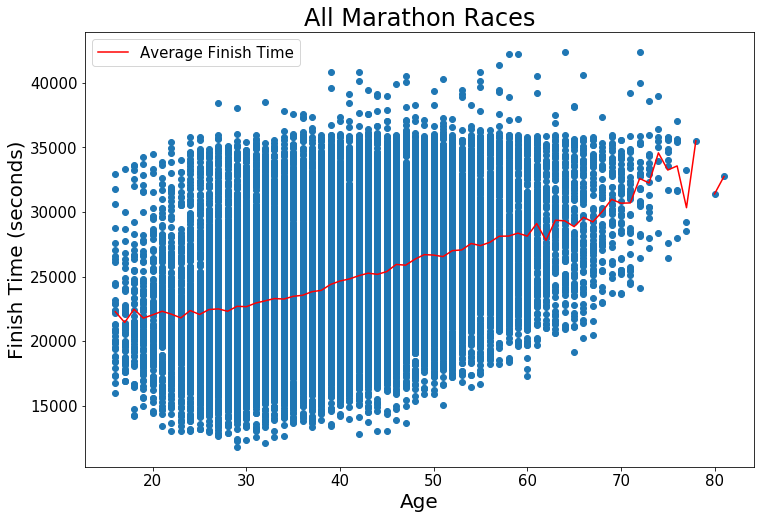

In [41]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

plt.scatter(ages, times)
plt.plot(np.arange(16,82), avg_time, color = 'red', label='Average Finish Time')
plt.title('All Marathon Races', size=24)
plt.xlabel('Age', size=20)
plt.ylabel('Finish Time (seconds)', size=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(prop={'size': 15})
plt.show()

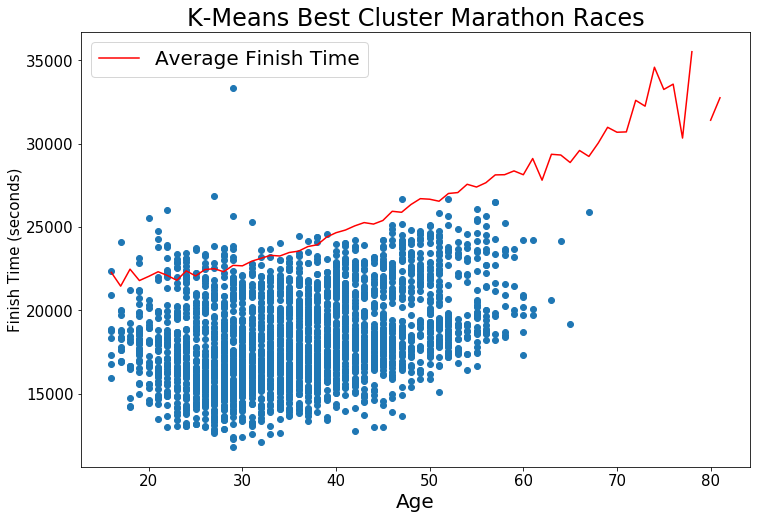

In [42]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

plt.scatter(best_ages, best_times)
plt.plot(np.arange(16,82), avg_time, color = 'red', label='Average Finish Time')
plt.title('K-Means Best Cluster Marathon Races', size=24)
plt.xlabel('Age', size=20)
plt.ylabel('Finish Time (seconds)', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(prop={'size': 20})
plt.show()